In [839]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [824]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [825]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [826]:
df = pd.read_csv('all_auction.csv', encoding = 'utf-8')
df.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
0,2020/12/7,永固一-KY,55461,櫃檯買賣,無擔保轉換公司債,美國標,"6,800",100,1,680,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
1,2020/12/4,信邦七,30237,櫃檯買賣,無擔保轉換公司債,美國標,"11,400",101,1,"1,140",...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
2,2020/12/4,達亞,6762,櫃檯買賣,初上櫃,美國標,"1,660",228.37,1,238,...,0,4.5,0,0,0,0,0,0.0,NaN,NaN
3,2020/12/3,森寶一,34891,櫃檯買賣,有擔保轉換公司債,美國標,900,103,1,90,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
4,2020/12/2,揚秦,2755,櫃檯買賣,初上櫃,美國標,"1,360",48,1,178,...,0,5.0,0,0,0,0,0,0.0,NaN,NaN


In [827]:
df.shape

(210, 24)

## 先清理重複的資料

In [828]:
df.loc[df['最低得標價格(元)'] != 0, '證券名稱'].value_counts()

聯廣         2
精測         2
泰昇-KY      2
新盛力        1
鋐寶科技       1
          ..
麗清         1
光隆精密-KY    1
昇陽半        1
三貝德        1
科際精密       1
Name: 證券名稱, Length: 207, dtype: int64

In [829]:
df[df['證券名稱'] =='精測']

## 兩筆為不同事件都要考慮

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
159,2017/9/18,精測,6510,櫃檯買賣,上櫃增資,美國標,"1,530","1,267.33",1,153,...,"1,772,575,830",1.0,216,"1,381","1,267.33","1,320","1,283.55",1267.33,1330.00,1250.0
185,2016/3/10,精測,6510,櫃檯買賣,初上櫃,美國標,1896,300,3,236,...,854748380,2.5,"2,667","17,457",440.2,482,450.82,360.00,478.18,590.0


In [830]:
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017/1/3,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,NaN,114.5
209,2017/1/3,泰昇-KY,8480,集中市場,第一上市初上市,美國標,3400,82.31,2,425,...,0,2.5,NaN,NaN,0,0,0,0.0,NaN,NaN


In [831]:
## 刪掉重複的一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='泰昇-KY')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017/1/3,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,NaN,114.5


In [832]:
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018/3/9,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN
145,2018/1/8,聯廣,8497,集中交易市場,初上市,美國標,"4,680",47.3,1,672,...,0,4.0,500,"4,308",0,0,0,0.0,70.77,NaN


In [833]:
## 刪掉流標的那一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='聯廣')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018/3/9,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN


## 不考慮得標總金額為 0 的資料 (可能是流標 或 正在標)


In [834]:
index_name = df[(df['得標總金額(元)'] == '0')].index
df.drop(index_name, inplace = True)
df.shape

(199, 24)

In [835]:
sum(df['得標總金額(元)'] == '0')

0

## 得標總金額為 0 的資料:
* 羅麗芬-ky, 聯廣, 泰福-ky 流標
* 其餘則是還在進行中 (資料取自2020.11.27)

## 將股票和可轉債標示類別

In [836]:
def label_stock(row):
    if row['發行性質'] in ['有擔保轉換公司債','無擔保轉換公司債']:
        return "cb"
    else:
        return "stock"   

In [837]:
df['類別'] = df.apply(lambda row : label_stock(row), axis = 1)
print('股票: %i' %(sum(df['類別'] == 'stock')))
print('可轉債: %i' %(sum(df['類別'] == 'cb')))

股票: 173
可轉債: 26


## 將df只選出開標前知道的資訊 + 最低得標價(Y)

In [838]:
df_1 = df[['開標日期','證券名稱', '證券代號', '發行市場', '發行性質', '競拍數量(張)', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)', '波券日開盤價']]
df_1.head()

KeyError: "['波券日開盤價'] not in index"

In [682]:
df_1.shape

(199, 12)

In [683]:
df_1.isnull().apply(lambda x: sum(x))

開標日期              0
證券名稱              0
證券代號              0
發行市場              0
發行性質              0
競拍數量(張)           0
最低投標價格(元)         0
最低每標單投標數量(張)      0
每一投標單投標處理費(元)     0
得標手續費率(%)         0
投標最後一天平均成交價      51
最低得標價格(元)         0
dtype: int64

In [684]:
df_1.dropna(inplace = True)
df_1.shape

(148, 12)

In [685]:
df_1.dtypes

開標日期              object
證券名稱              object
證券代號               int64
發行市場              object
發行性質              object
競拍數量(張)           object
最低投標價格(元)         object
最低每標單投標數量(張)       int64
每一投標單投標處理費(元)      int64
得標手續費率(%)        float64
投標最後一天平均成交價      float64
最低得標價格(元)         object
dtype: object

In [686]:
## 將這三個變數改為數值變數
obj_col = ['競拍數量(張)', '最低投標價格(元)', '最低得標價格(元)']
for col in obj_col:
    df_1[col] = df_1[col].apply(lambda x: x.replace(',', '')) 
    df_1[col] = df_1[col].apply(pd.to_numeric, errors = 'coerce')

df_1.isnull().apply(lambda x: sum(x))

開標日期             0
證券名稱             0
證券代號             0
發行市場             0
發行性質             0
競拍數量(張)          0
最低投標價格(元)        0
最低每標單投標數量(張)     0
每一投標單投標處理費(元)    0
得標手續費率(%)        0
投標最後一天平均成交價      0
最低得標價格(元)        0
dtype: int64

In [687]:
df_1.dtypes

開標日期              object
證券名稱              object
證券代號               int64
發行市場              object
發行性質              object
競拍數量(張)            int64
最低投標價格(元)        float64
最低每標單投標數量(張)       int64
每一投標單投標處理費(元)      int64
得標手續費率(%)        float64
投標最後一天平均成交價      float64
最低得標價格(元)        float64
dtype: object

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


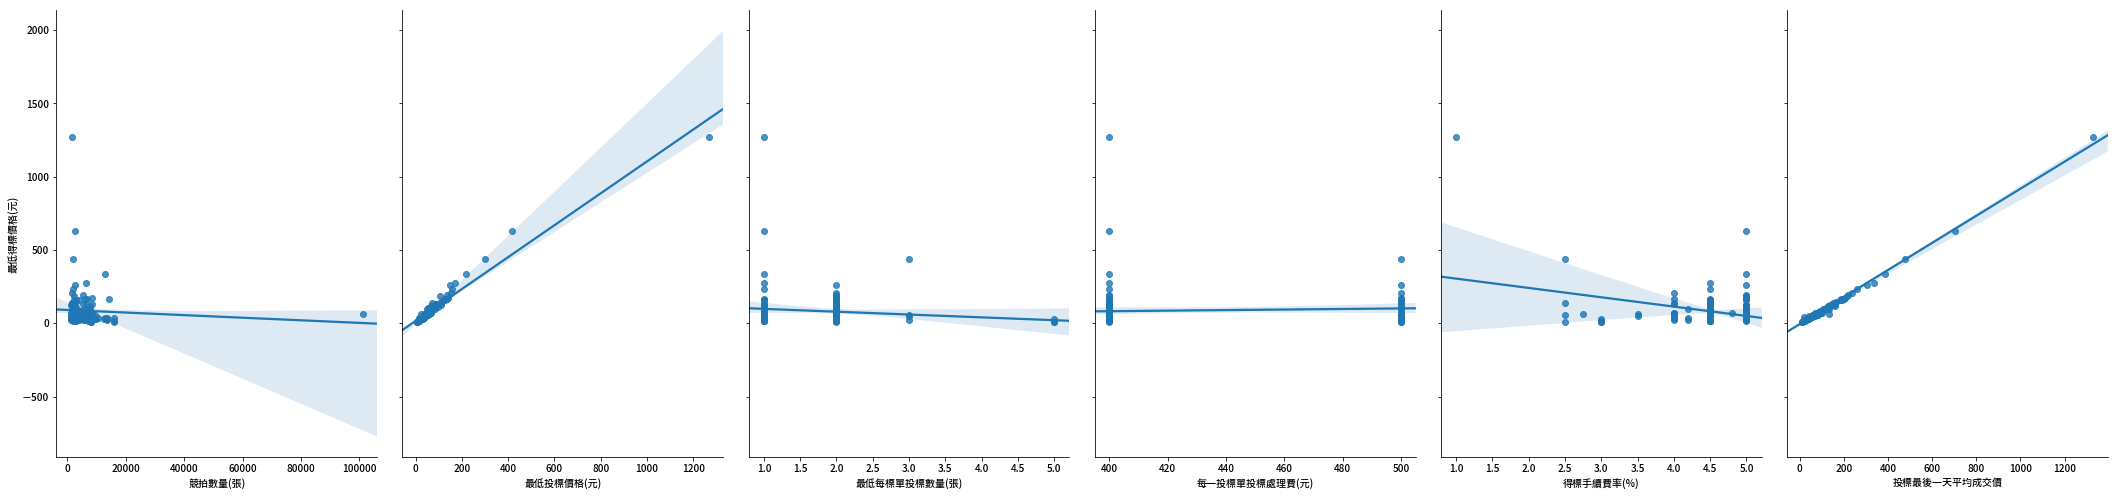

In [688]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

In [689]:
outlier = df_1['最低投標價格(元)'] > 1200
df_1[outlier]

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元)
159,2017/9/18,精測,6510,櫃檯買賣,上櫃增資,1530,1267.33,1,400,1.0,1330.0,1267.33


In [690]:
index = df_1[outlier].index
df_1.drop(index, inplace = True)

In [691]:
outlier = df_1['競拍數量(張)'] > 80000
df_1[outlier]

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元)
57,2019/11/25,和潤企業,6592,集中交易市場,初上市,101081,45.69,2,400,2.75,130.59,60.88


In [692]:
index = df_1[outlier].index
df_1.drop(index, inplace = True)

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


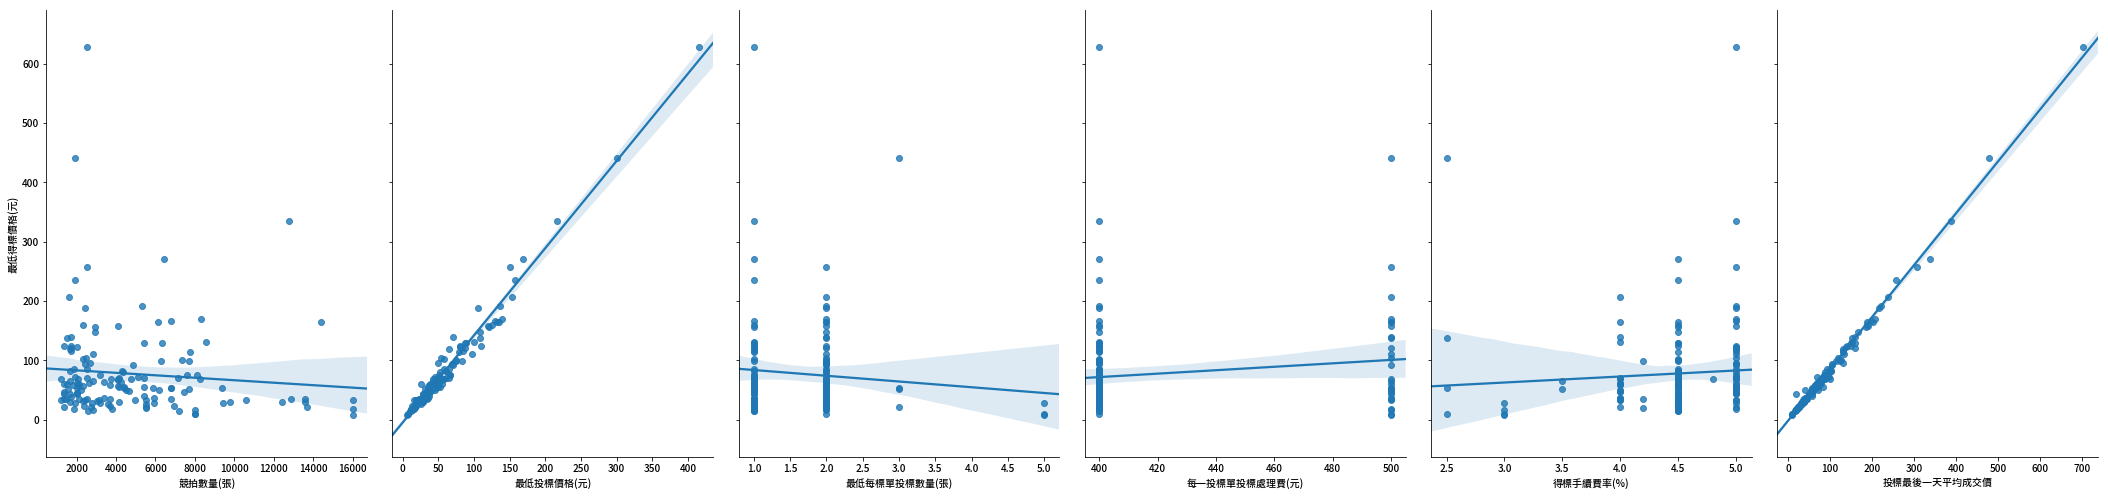

In [693]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

In [694]:
df_1['發行性質'].value_counts()

初上櫃        90
初上市        55
第一上市初上市     1
Name: 發行性質, dtype: int64

In [695]:
index = df_1[df_1['發行性質']=='第一上市初上市'].index
df_1.drop(index, inplace = True)

In [696]:
dummies = pd.get_dummies(df_1['發行性質'])
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['發行性質'], axis = 1, inplace = True)
df_1.drop(['初上櫃'], axis = 1, inplace = True)   ## 將發行性質轉成類別變數 上市=1, 上櫃=0

In [697]:
dummies = pd.get_dummies(df_1['每一投標單投標處理費(元)'])
dummies.columns = ['處理費_400','處理費_500']
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['每一投標單投標處理費(元)', '處理費_500'], axis = 1, inplace = True)    ## 處理費轉為類別變數 處利費400=1, 500=0

In [698]:
dummies = pd.get_dummies(df_1['最低每標單投標數量(張)'])
dummies.columns = ['最低每標單投_1','最低每標單投_2','最低每標單投_3','最低每標單投_5']
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['最低每標單投標數量(張)', '最低每標單投_5'], axis = 1, inplace = True)
df_1.columns

Index(['開標日期', '證券名稱', '證券代號', '發行市場', '競拍數量(張)', '最低投標價格(元)', '得標手續費率(%)',
       '投標最後一天平均成交價', '最低得標價格(元)', '初上市', '處理費_400', '最低每標單投_1', '最低每標單投_2',
       '最低每標單投_3'],
      dtype='object')

In [699]:
df_1.shape

(145, 14)

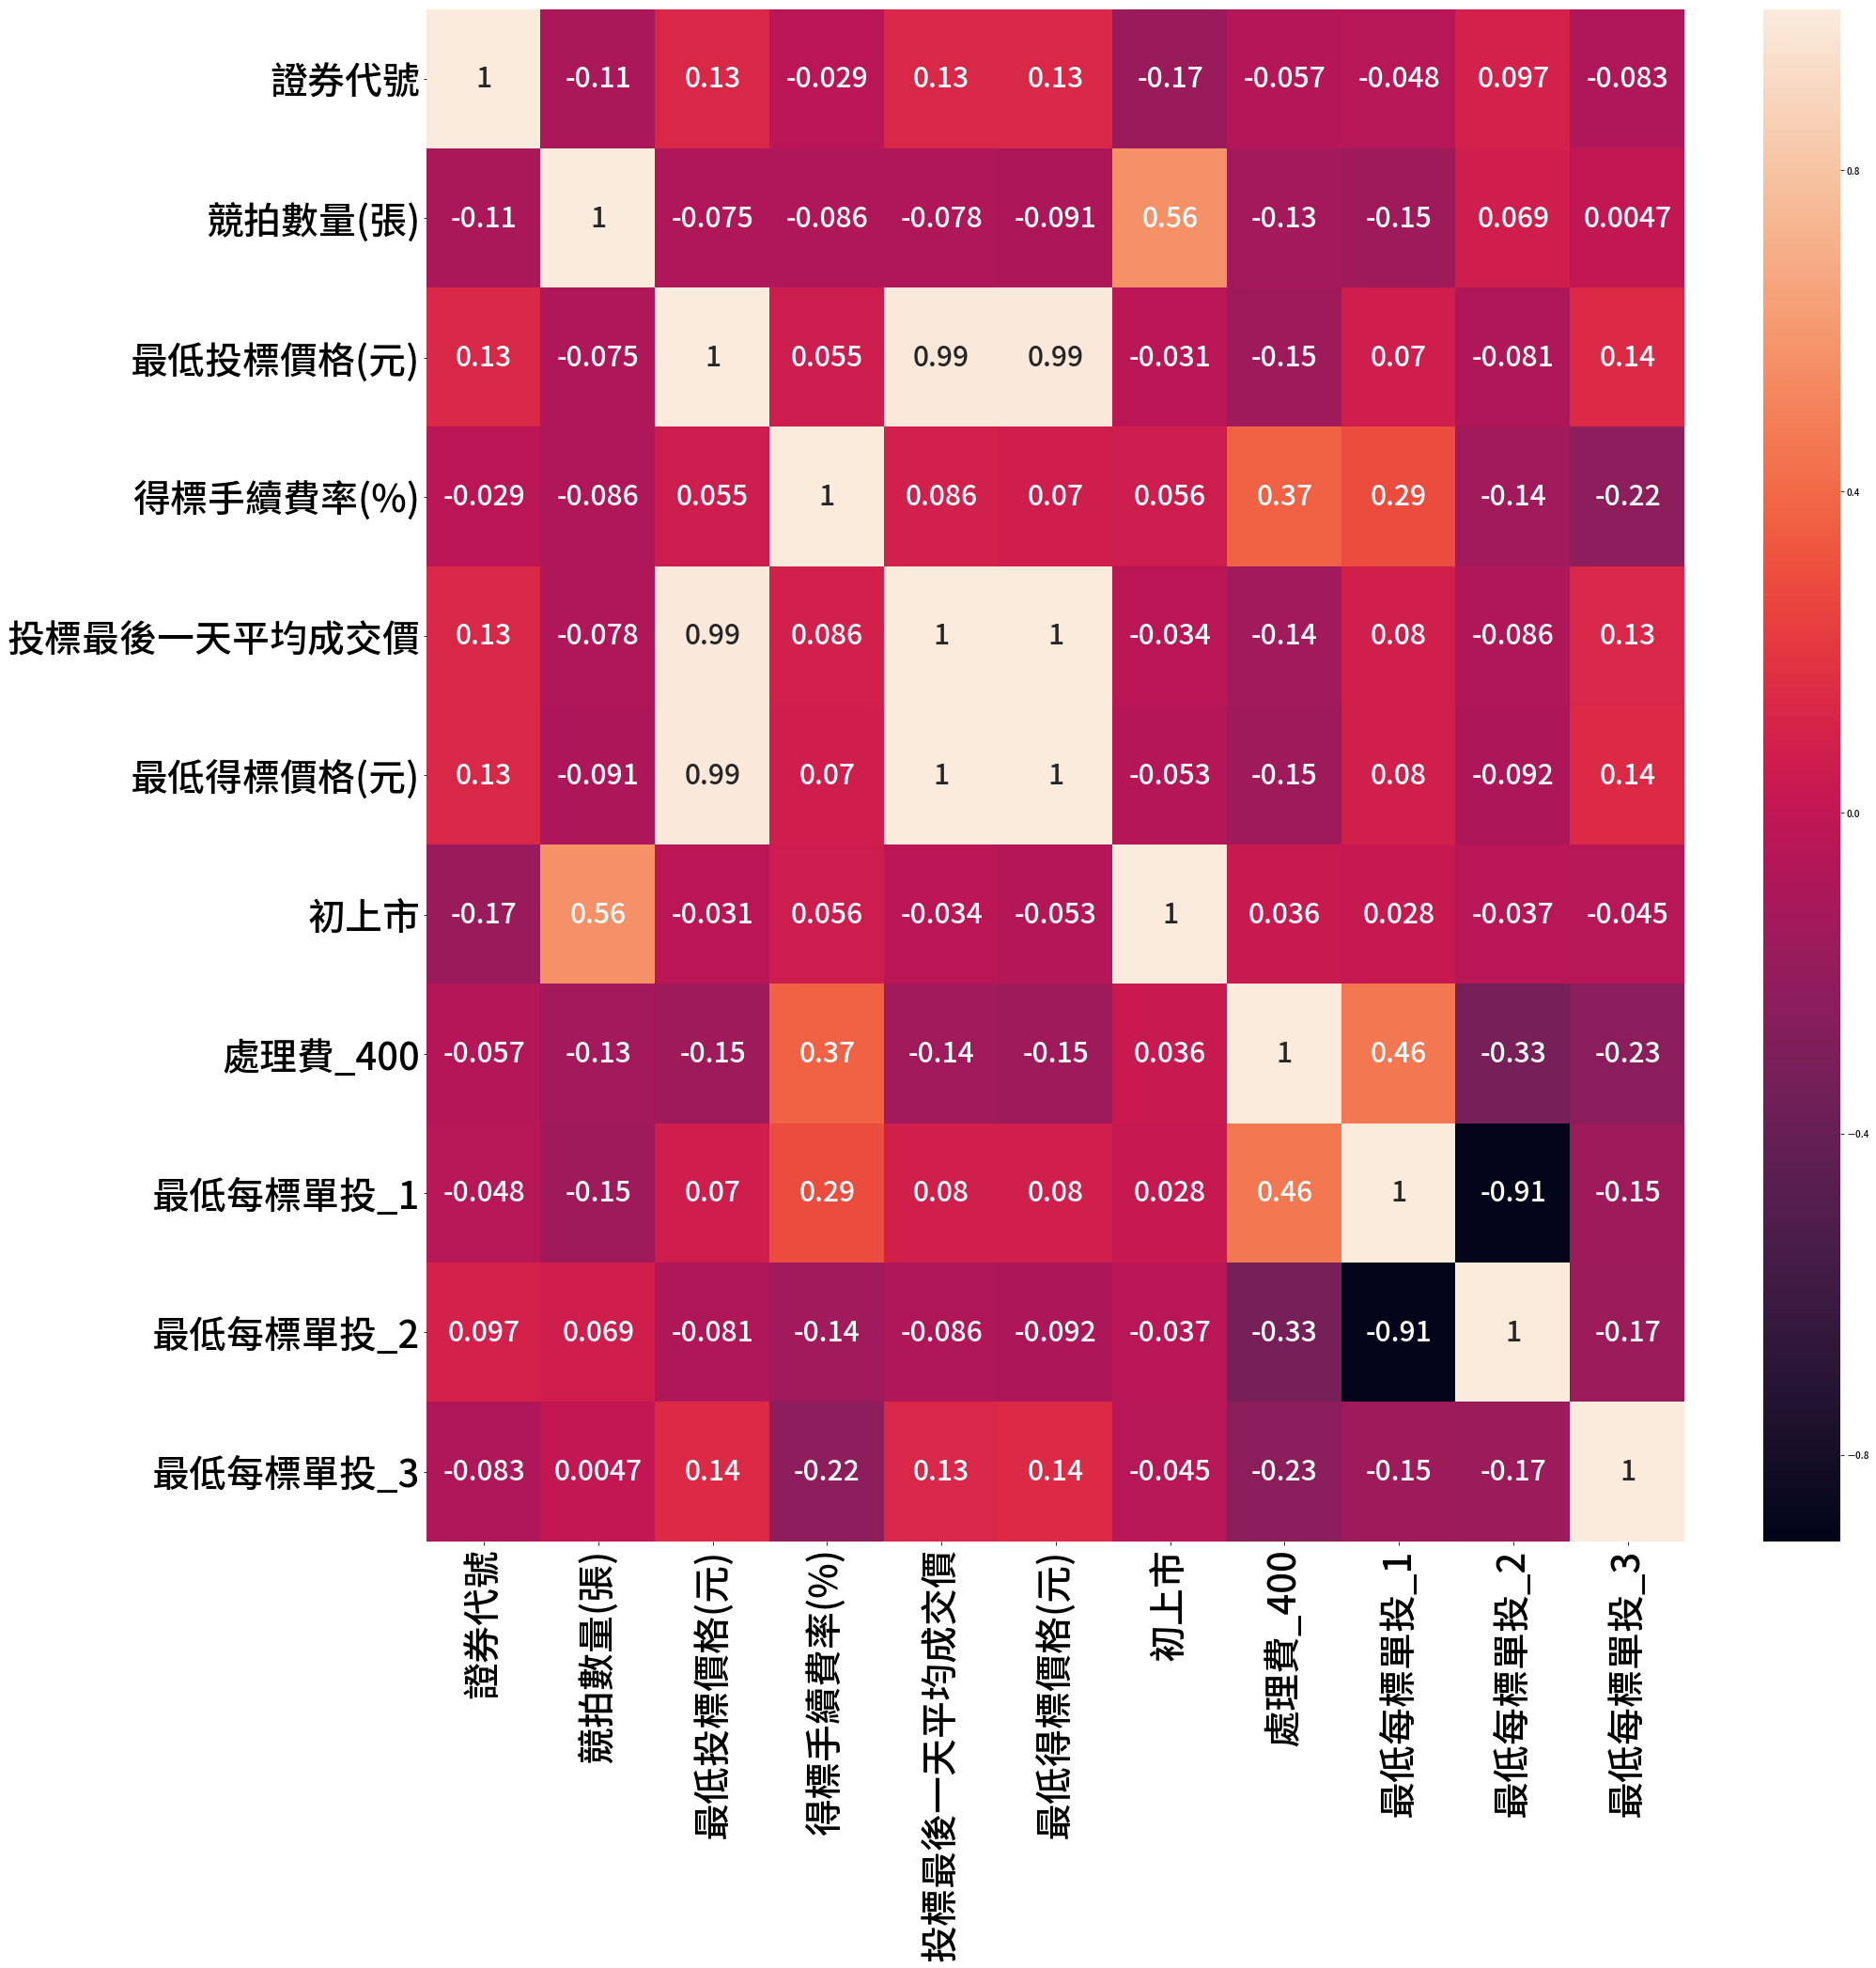

In [700]:
plt.figure(figsize=(30, 30))
corrMatrix = df_1.corr()

res = sn.heatmap(corrMatrix, annot=True, annot_kws={"size": 30})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 40, rotation = 90)

res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 40, rotation = 0)
plt.show()

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


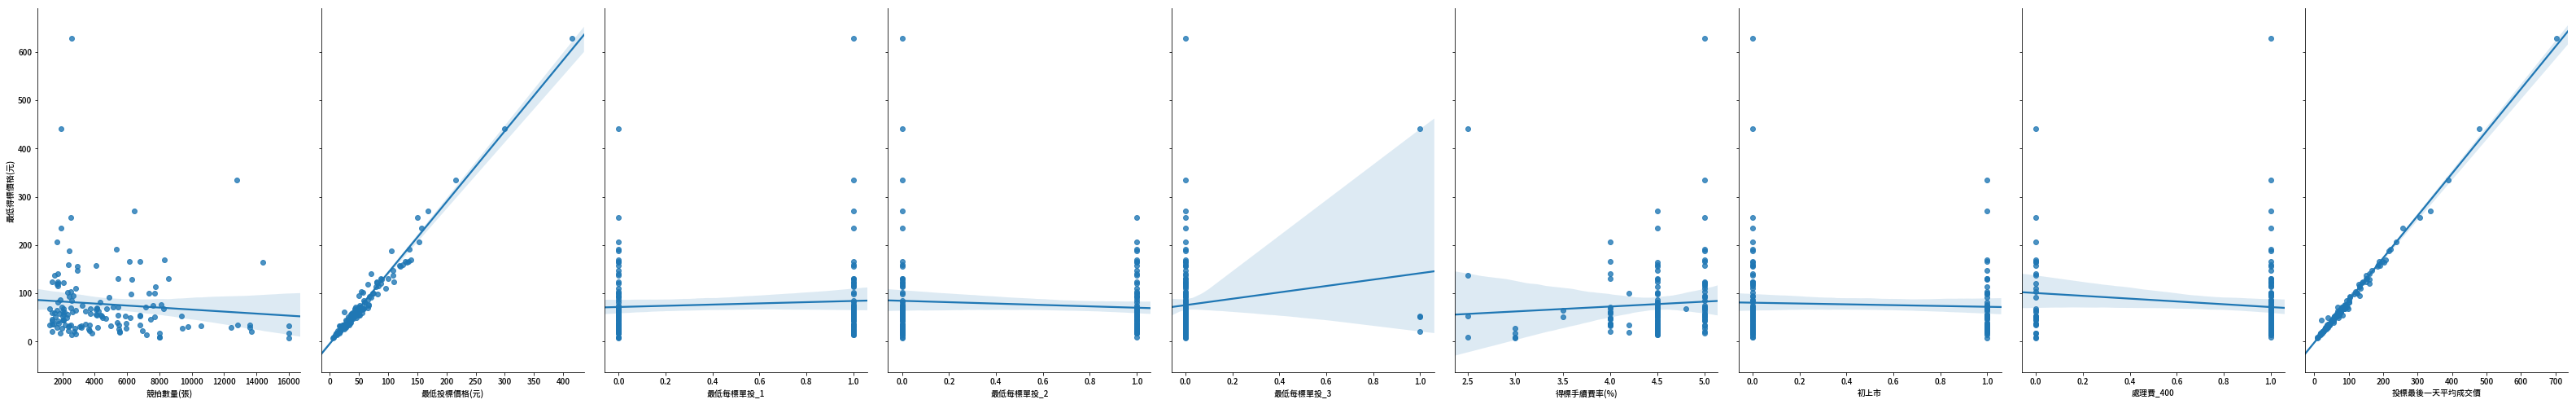

In [701]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

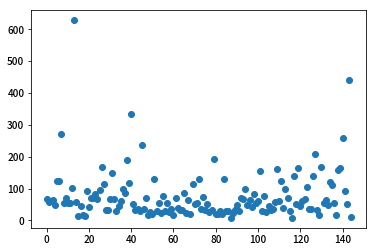

In [755]:
plt.scatter(df_1.index, df_1['最低得標價格(元)'])

## 切資料 將最近的30筆當作test 其他的拿去train

In [702]:
df_1['開標日期'] = pd.to_datetime(df_1['開標日期'])
df_1['開標日期']

7     2020-11-27
8     2020-11-26
10    2020-11-17
11    2020-11-10
12    2020-11-06
         ...    
200   2016-10-13
205   2016-12-05
206   2016-12-07
207   2016-12-14
208   2016-12-16
Name: 開標日期, Length: 145, dtype: datetime64[ns]

In [703]:
df_1 = df_1.sort_values(by = '開標日期', ascending = False)
df_1.reset_index(inplace = True, drop = True)
df_1

,開標日期,證券名稱,證券代號,發行市場,競拍數量(張),最低投標價格(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),初上市,處理費_400,最低每標單投_1,最低每標單投_2,最低每標單投_3
0,2020-11-27,耀登科技,3138,集中交易市場,3740,42.59,4.8,80.84,68.60,1,1,1,0,0
1,2020-11-26,叡揚資訊,6752,櫃檯買賣,1800,50.00,4.0,67.49,58.51,0,1,1,0,0
2,2020-11-17,亞泰金屬,6727,櫃檯買賣,2005,48.00,5.0,68.97,62.40,0,1,1,0,0
3,2020-11-10,八貫,1342,集中交易市場,4234,50.00,4.5,76.48,63.60,1,1,1,0,0
4,2020-11-06,陞達科技,4945,櫃檯買賣,2244,34.86,5.0,40.32,49.90,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2016-06-01,達爾膚,6523,櫃檯買賣,2538,150.40,5.0,305.91,257.21,0,0,0,1,0
141,2016-05-17,愛普,6531,集中市場,4885,71.00,5.0,103.93,92.00,1,0,0,1,0
142,2016-05-05,寒舍,2739,集中市場,7723,38.80,3.5,59.74,52.00,1,0,0,0,1
143,2016-03-10,精測,6510,櫃檯買賣,1896,300.00,2.5,478.18,440.20,0,0,0,0,1


In [704]:
## 切前30筆當作test data 剩下當作 train data
test_df = df_1.iloc[:30]
train_df = df_1.iloc[30:]

In [705]:
X_train = train_df[['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','投標最後一天平均成交價']]
y_train = train_df['最低得標價格(元)']

In [706]:
X_test = test_df[['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','投標最後一天平均成交價']]
y_test = test_df['最低得標價格(元)']

In [707]:
y_train.shape, X_train.shape

((115,), (115, 9))

In [708]:
vif1 = pd.DataFrame()
vif1['features'] = X_train.columns
vif1["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,features,VIF
1,最低投標價格(元),77.22
8,投標最後一天平均成交價,74.50
5,得標手續費率(%),42.99
3,最低每標單投_2,22.23
2,最低每標單投_1,14.55
7,處理費_400,5.79
0,競拍數量(張),4.19
6,初上市,2.45
4,最低每標單投_3,2.05


In [741]:
x_train1 = X_train[['投標最後一天平均成交價', '得標手續費率(%)', '最低每標單投_1','最低每標單投_2','最低每標單投_3', '處理費_400', '競拍數量(張)', '初上市']]
x_train1_c = sm.add_constant(x_train1)
lm1 = sm.OLS(y_train, x_train1_c).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2088.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          6.68e-113
Time:                        16:15:40   Log-Likelihood:                -353.95
No. Observations:                 115   AIC:                             725.9
Df Residuals:                     106   BIC:                             750.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.3658      4.952      2.497      0.014       2.547      22.184
投標最後一天平均成交價     0.8717      0.007    119.435      0.000       0.857       0.886
得標手續費率(%)      -2.7368      1.034     -2.647      0.009      -4.786      -0.687
最低每標單投_1       -0.8819      3.690     -0.239      0.812      -8.199       6.435
最低每標單投_2       -1.1926      3.506     -0.340      0.734      -8.143       5.758
最低每標單投_3        3.4309      4.388      0.782      0.436      -5.269      12.131
處理費_400        -0.4441      1.422     -0.312      0.755      -3.262       2.374
競拍數量(張)        -0.0001      0.000     -0.655      0.514      -0.000       0.000
初上市            -1.5816      1.286     -1.229      0.222      -4.132       0.969
==============================================================================
Omnibus:                       38.408   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.187
Skew:                           0.885   Prob(JB):                     1.04e-50
Kurtosis:                       9.701   Cond. No.                     8.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [742]:
vif2 = pd.DataFrame()
vif2['features'] = x_train1.columns
vif2["VIF"] = [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])]
vif2['VIF'] = round(vif1['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,features,VIF
1,得標手續費率(%),77.22
5,處理費_400,42.99
3,最低每標單投_2,22.23
2,最低每標單投_1,14.55
7,初上市,5.79
0,投標最後一天平均成交價,4.19
6,競拍數量(張),2.45
4,最低每標單投_3,2.05


In [743]:
x_train2 = X_train[['投標最後一天平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市']]
x_train2_c = sm.add_constant(x_train2)
lm2 = sm.OLS(y_train, x_train2_c).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4309.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          7.35e-120
Time:                        16:15:57   Log-Likelihood:                -354.27
No. Observations:                 115   AIC:                             718.5
Df Residuals:                     110   BIC:                             732.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.9520      4.140      2.645      0.009       2.747      19.157
投標最後一天平均成交價     0.8724      0.007    128.178      0.000       0.859       0.886
得標手續費率(%)      -2.8375      0.943     -3.010      0.003      -4.706      -0.969
最低每標單投_3        4.5551      2.862      1.592      0.114      -1.116      10.226
初上市            -2.0191      1.037     -1.948      0.054      -4.073       0.035
==============================================================================
Omnibus:                       40.779   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.868
Skew:                           0.959   Prob(JB):                     1.50e-54
Kurtosis:                       9.932   Cond. No.                         987.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [744]:
vif3 = pd.DataFrame()
vif3['features'] = x_train2.columns
vif3["VIF"] = [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)
vif3

,features,VIF
1,得標手續費率(%),3.07
0,投標最後一天平均成交價,2.41
3,初上市,1.67
2,最低每標單投_3,1.07


In [745]:
x_train3 = X_train[['投標最後一天平均成交價', '得標手續費率(%)', '初上市']]
x_train3_c = sm.add_constant(x_train3)
lm3 = sm.OLS(y_train, x_train3_c).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     5666.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          3.14e-121
Time:                        16:16:20   Log-Likelihood:                -355.58
No. Observations:                 115   AIC:                             719.2
Df Residuals:                     111   BIC:                             730.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.4096      4.065      3.053      0.003       4.354      20.465
投標最後一天平均成交價     0.8745      0.007    130.050      0.000       0.861       0.888
得標手續費率(%)      -3.1725      0.925     -3.429      0.001      -5.006      -1.339
初上市            -2.0584      1.043     -1.973      0.051      -4.126       0.009
==============================================================================
Omnibus:                       42.868   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.392
Skew:                           1.032   Prob(JB):                     7.78e-57
Kurtosis:                      10.047   Cond. No.                         945.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [746]:
x_train4 = X_train[['投標最後一天平均成交價', '得標手續費率(%)']]
x_train4_c = sm.add_constant(x_train4)
lm4 = sm.OLS(y_train, x_train4_c).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     8283.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          2.06e-122
Time:                        16:16:44   Log-Likelihood:                -357.56
No. Observations:                 115   AIC:                             721.1
Df Residuals:                     112   BIC:                             729.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.3989      4.118      3.011      0.003       4.241      20.557
投標最後一天平均成交價     0.8752      0.007    128.682      0.000       0.862       0.889
得標手續費率(%)      -3.3681      0.932     -3.615      0.000      -5.214      -1.522
==============================================================================
Omnibus:                       43.739   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.707
Skew:                           1.022   Prob(JB):                     1.23e-63
Kurtosis:                      10.502   Cond. No.                         945.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* lm2 Y ~ '投標最後一天平均成交價', '得標手續費率(%)', '初上市', '最低每標單投_3'
* lm3 Y ~ '投標最後一天平均成交價', '得標手續費率(%)', '初上市'
* lm4 Y ~ '投標最後一天平均成交價', '得標手續費率(%)'

In [715]:
def vif_df(X):
    vif_df = pd.DataFrame()
    vif_df['features'] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by = "VIF", ascending = False)
    return(vif_df)

In [716]:
vif_summary = vif1
trainx_list = [x_train1, x_train2,x_train3, x_train4] 
for xlist in trainx_list:
    vif = vif_df(xlist)
    vif_summary = pd.merge(vif_summary, vif, on = 'features', how = 'outer')
vif_summary.columns = ['features','vif1','vif2', 'vif3', 'vif4','vif5']
vif_summary

,features,vif1,vif2,vif3,vif4,vif5
0,最低投標價格(元),77.22,NaN,NaN,NaN,NaN
1,投標最後一天平均成交價,74.50,2.69,2.41,2.30,2.3
2,得標手續費率(%),42.99,42.26,3.07,3.06,2.3
3,最低每標單投_2,22.23,21.60,NaN,NaN,NaN
4,最低每標單投_1,14.55,14.20,NaN,NaN,NaN
5,處理費_400,5.79,5.79,NaN,NaN,NaN
6,競拍數量(張),4.19,4.17,NaN,NaN,NaN
7,初上市,2.45,2.45,1.67,1.67,NaN
8,最低每標單投_3,2.05,1.98,1.07,NaN,NaN


In [717]:
model_list = [lm2, lm3, lm4]
aic = []
bic = []
mse = []
a_rsq = []

for model in model_list:
    aic.append(model.aic)
    bic.append(model.bic)
    mse.append(model.mse_resid)
    a_rsq.append(model.rsquared_adj)

select_df =  pd.DataFrame()
select_df['AIC'] = aic
select_df["BIC"] = bic
select_df['MSE'] = mse
select_df["A_RSQ"] = a_rsq
select_df.index = ['lm2', 'lm3', 'lm4']
select_df

,AIC,BIC,MSE,A_RSQ
lm2,718.539136,732.263796,29.014177,0.993428
lm3,719.157861,730.137590,29.415044,0.993337
lm4,721.120637,729.355434,30.174479,0.993165


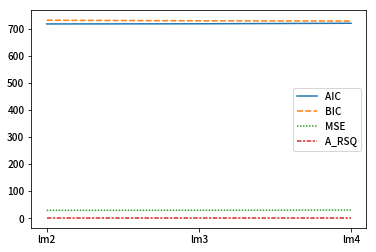

In [718]:
sn.lineplot(data = select_df)

## 殘差分析
### error terms = y_actual - y_predicted

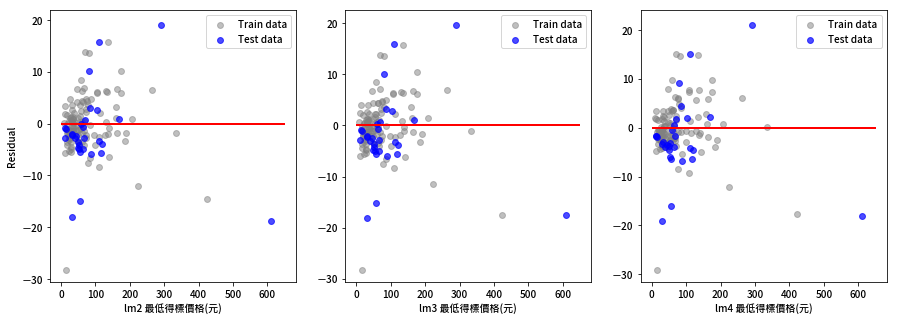

In [762]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
y_train_pred2 = lm2.predict(x_train2_c)
plt.scatter(y_train_pred2, y_train_pred2 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred2, y_test_pred2 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm2 最低得標價格(元)')
plt.ylabel('Residual')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')

plt.subplot(1,3,2)
y_train_pred3 = lm3.predict(x_train3_c)
plt.scatter(y_train_pred3, y_train_pred3 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred3, y_test_pred3 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm3 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')

plt.subplot(1,3,3)
y_train_pred4 = lm4.predict(x_train4_c)
plt.scatter(y_train_pred4, y_train_pred4 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred4, y_test_pred4 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm4 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')

In [763]:
res2 = y_train - y_train_pred2
print('MSE for lm2_train: %f' %(sum([i**2 for i in res2])/ len(res2)))

res3 = y_train - y_train_pred3
print('MSE for lm3_train: %f' %(sum([i**2 for i in res3])/ len(res3)))

res4 = y_train - y_train_pred4
print('MSE for lm4_train: %f' %(sum([i**2 for i in res4])/ len(res4)))

MSE for lm2_train: 27.752691
MSE for lm3_train: 28.391913
MSE for lm4_train: 29.387319


In [749]:

X_test2 = X_test[['投標最後一天平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市']]
x_test_lm2 = sm.add_constant(X_test2)
y_test_pred2 = lm2.predict(x_test_lm2)
res2 = y_test - y_test_pred2
print('MSE for lm2_test: %f' %(sum([i**2 for i in res2])/ len(res2)))

X_test3 = X_test[['投標最後一天平均成交價', '得標手續費率(%)', '初上市']]
x_test_lm3 = sm.add_constant(X_test3)
y_test_pred3 = lm3.predict(x_test_lm3)
res3 = y_test - y_test_pred3
print('MSE for lm3_test: %f' %(sum([i**2 for i in res3])/ len(res3)))

X_test4 = X_test[['投標最後一天平均成交價', '得標手續費率(%)']]
x_test_lm4 = sm.add_constant(X_test4)
y_test_pred4 = lm4.predict(x_test_lm4)
res4 = y_test - y_test_pred4
print('MSE for lm4_test: %f' %(sum([i**2 for i in res4])/ len(res4)))

MSE for lm2_test: 63.269042
MSE for lm3_test: 63.089297
MSE for lm4_test: 68.470103


## 從MSE看出lm4表現最差 所以只留下lm2和lm3進到回測階段

In [790]:
null_index = df_1.index[np.where(np.isnan(df_1['撥券日開盤價']))[0]] 
df_1.iloc[null_index]

,level_0,index,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),撥券日開盤價
0,0,7,2020/11/27,耀登科技,3138,集中交易市場,初上市,"3,740",42.59,1,400,4.8,80.84,68.6,NaN
1,1,8,2020/11/26,叡揚資訊,6752,櫃檯買賣,初上櫃,"1,800",50,1,400,4.0,67.49,58.51,NaN
30,30,37,2020/4/20,撼訊四,61504,櫃檯買賣,無擔保轉換公司債,"3,550",100,1,400,0.5,NaN,102.22,NaN
73,73,80,2019/3/22,康控一KY,49431,櫃檯買賣,無擔保轉換公司債,"13,500",100,1,400,1.0,NaN,100.5,NaN
129,129,137,2018/3/9,聯廣,8497,集中交易市場,初上市,"4,680",40,1,400,4.0,58.53,47.6,NaN
163,163,173,2017/5/16,亞獅康-KY,6497,櫃檯買賣,第一上櫃初上櫃,"10,409",64,1,400,3.0,NaN,64,NaN
193,193,203,2016/11/28,冠科-KY,6554,櫃檯買賣,第一上櫃初上櫃,9447,45.67,2,500,5.0,NaN,53.1,NaN


In [782]:

def suc_n_profit(df_stock, pred):
    df_output = pd.DataFrame()
    df_output['最低投標價格(元)'] = df_stock['最低投標價格(元)']
    df_output['最低得標價格(元)'] = df_stock['最低得標價格(元)']
    df_output['撥券日開盤價'] = df_stock['撥券日開盤價']
    df_output['pred_y'] = pred
    df_output['success'] = 0
    df_output['success'] = np.where(df_output['pred_y'] >= df_output['最低得標價格(元)'], 1, 0)
    df_output['profit'] = np.where(df_output['success'] == 1, (df_output['撥券日開盤價']*1000 - (500 + df_output['pred_y']*1.05*1000)), -500)

    return df_output

In [783]:
sum(df_1['撥券日開盤價'].isnull())


7